# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [16]:
import pandas as pd

In [17]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
20056   38  Self-emp-not-inc  151322       HS-grad              9   
9694    27           Private  156266       HS-grad              9   
1295    26           Private  280093       5th-6th              3   
6506    25           Private  315643       HS-grad              9   
3069    48           Private  176140          11th              7   
11352   53      Self-emp-inc  251675  Some-college             10   
25306   56       Federal-gov  277420     Bachelors             13   
17662   33           Private  184306     Bachelors             13   
15759   42           Private  322385     Assoc-voc             11   
19485   46       Federal-gov   46537       Masters             14   

           marital-status         occupation   relationship  \
20056           Separated       Craft-repair  Not-in-family   
9694        Never-married              Sales      Own-child   
1295   Married-civ-spouse       Craft-repair        Husband   
6506   Married-civ-spouse      Other-service        Husband   
3069             Divorced      Other-service      Unmarried   
11352            Divorced              Sales  Not-in-family   
25306  Married-civ-spouse    Exec-managerial        Husband   
17662  Married-civ-spouse     Prof-specialty        Husband   
15759  Married-civ-spouse  Machine-op-inspct        Husband   
19485       Never-married     Prof-specialty  Not-in-family   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
20056               White    Male             0             0              40   
9694   Amer-Indian-Eskimo    Male             0             0              20   
1295                White    Male             0          1628              50   
6506                White    Male             0             0              30   
3069                Black  Female             0             0              40   
11352               White    Male          8614             0              50   
25306               White    Male             0             0              40   
17662               White    Male             0             0              45   
15759               White    Male          2407             0              40   
19485               White  Female             0             0              40   

      native-country income  
20056  United-States  <=50K  
9694   United-States  <=50K  
1295   United-States  <=50K  
6506   United-States  <=50K  
3069   United-States  <=50K  
11352           Cuba   >50K  
25306    Puerto-Rico   >50K  
17662  United-States  <=50K  
15759  United-States  <=50K  
19485  United-States  <=50K

In [18]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [19]:
numerical_features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data_numerical = data[numerical_features]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

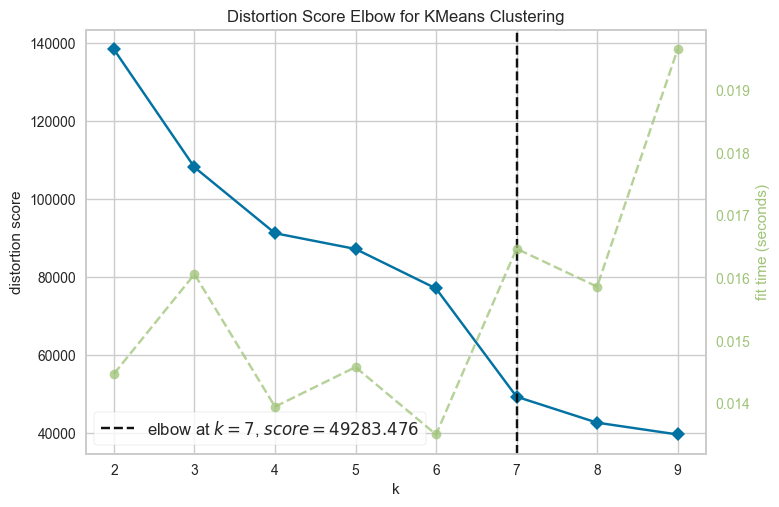

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(data_scaled)
visualizer.show()

Graficul utilizează metoda "elbow" pentru a determina numărul optim de clustere (k) pentru algoritmul KMeans. Pe axa verticală din stânga este reprezentat scorul de distorsiune, iar pe axa orizontală este reprezentat numărul de clustere (k). Pe axa verticală din dreapta este reprezentat timpul de ajustare (fit time) în secunde. Linia albastră arată cum scade scorul de distorsiune pe măsură ce crește numărul de clustere, iar linia verde arată timpul de ajustare pentru fiecare valoare a lui k. Punctul de "elbow" este marcat la k = 7, unde scorul de distorsiune este 49283.476, indicând că acesta este numărul optim de clustere, deoarece după acest punct, reducerea scorului de distorsiune devine mai puțin semnificativă. Graficul este relevant pentru a evalua eficiența și performanța algoritmului KMeans în funcție de numărul de clustere.

In [22]:
from sklearn.metrics import silhouette_score

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"Silhouette Score for K={k}: {score:.4f}")

Silhouette Score for K=2: 0.2109
Silhouette Score for K=3: 0.2492
Silhouette Score for K=4: 0.2792
Silhouette Score for K=5: 0.2578
Silhouette Score for K=6: 0.2847
Silhouette Score for K=7: 0.3093
Silhouette Score for K=8: 0.3279
Silhouette Score for K=9: 0.3196
Silhouette Score for K=10: 0.3291
Silhouette Score for K=11: 0.3305
Silhouette Score for K=12: 0.3036
Silhouette Score for K=13: 0.2698
Silhouette Score for K=14: 0.2799
Silhouette Score for K=15: 0.2853
Silhouette Score for K=16: 0.2741
Silhouette Score for K=17: 0.2775
Silhouette Score for K=18: 0.2775
Silhouette Score for K=19: 0.2750


Scorurile silhouette prezentate în această analiză evaluează calitatea clusteringului pentru diferite valori de K în algoritmul KMeans. Scorurile variază de la 0.2109 pentru K=2 la 0.2750 pentru K=19, indicând o creștere a calității clusteringului pe măsură ce numărul de clustere crește. Cel mai înalt scor silhouette, 0.3305, este atins pentru K=11, sugerând că această valoare de K oferă cea mai bună separare și coeziune între clustere. Pe măsură ce numărul de clustere crește, crește și distanța medie între un punct și punctele din clusterul său propriu comparativ cu punctele din alte clustere, ceea ce reflectă o mai bună definire a granițelor dintre clustere. Totuși, este important să considerăm și alte aspecte precum complexitatea și interpretabilitatea modelului.

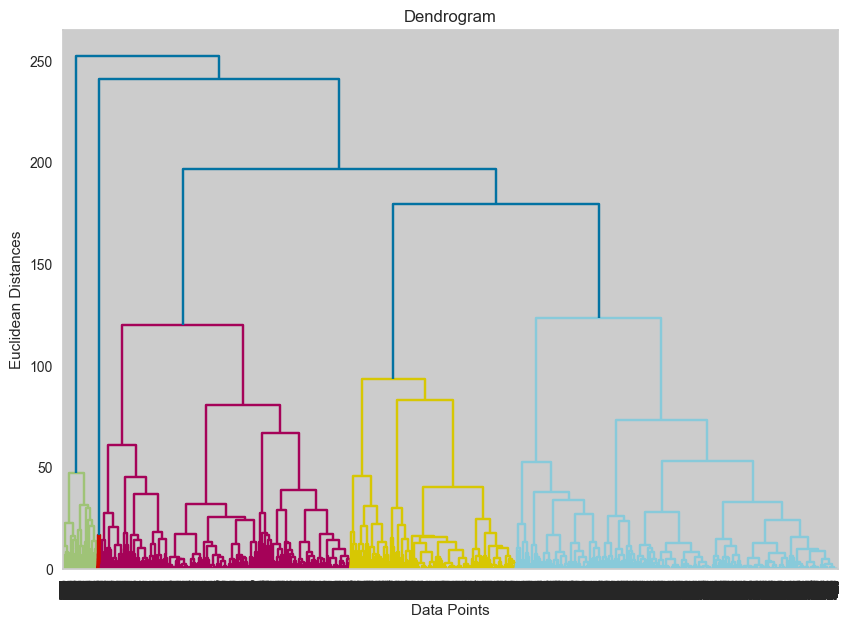

In [23]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(data_scaled)

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

Graficul prezintă un dendrogram, utilizat pentru a ilustra structura grupelor formate prin tehnica de clusterizare ierarhică. Pe axa x sunt reprezentate punctele de date, iar pe axa y sunt reprezentate distanțele euclidiene dintre grupe. Dendrogramul arată cum punctele individuale de date sunt fuzionate în grupe și cum aceste grupe sunt ulterior unite în grupe mai mari, până când toate punctele de date sunt grupate într-o singură grupă. Înălțimea liniilor din dendrogram indică distanța sau disimilitudinea dintre grupe. Diferite culori sunt folosite pentru a distinge între diverse grupe la diferite niveluri ale ierarhiei. Această vizualizare este relevantă pentru înțelegerea structurii și relațiilor dintr-un set de date, ajutând la identificarea grupărilor naturale și a nivelului de similaritate dintre punctele de date.

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

Number of clusters found by DBSCAN: 17


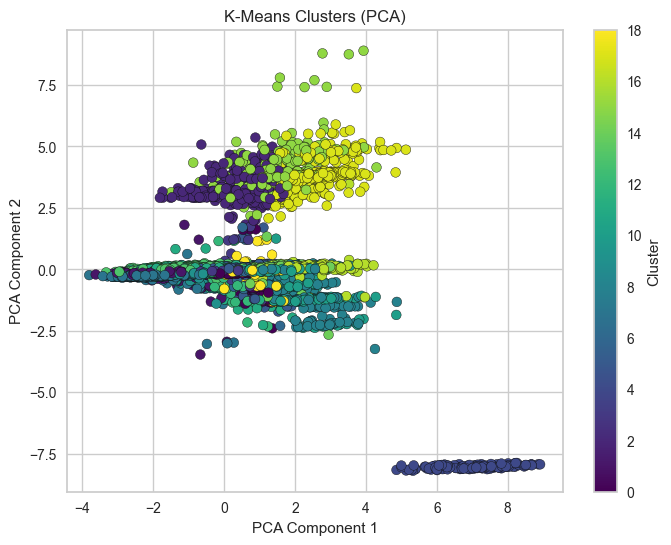

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap="viridis", marker="o", edgecolor="k")
plt.title("K-Means Clusters (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Graficul intitulat "K-Means Clusters (PCA)" prezintă rezultatele unui algoritm de clustering K-Means aplicat datelor reduse la două componente principale folosind Analiza Componentelor Principale (PCA). Pe axa x este reprezentată "PCA Component 1", iar pe axa y este reprezentată "PCA Component 2". Punctele de date sunt colorate în funcție de apartenența la cluster, cu o paletă de culori variind de la violet (cluster 0) la galben (cluster 9), așa cum este indicat de bara de culori din partea dreaptă a graficului. Graficul arată mai multe clustere distincte de puncte de date, unele fiind mai dens grupate, iar altele mai dispersate. Această vizualizare este utilă pentru a demonstra cum algoritmul K-Means a grupat datele în diferite clustere pe baza similitudinilor lor într-un spațiu bidimensional redus, oferind o perspectivă asupra structurii subiacente a datelor.

In [26]:
data["Cluster"] = kmeans.labels_

# Select only numeric columns for the summary
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_summary = data.groupby("Cluster")[numeric_columns].mean()
print(cluster_summary)

               age         fnlwgt  education-num  capital-gain  capital-loss  \
Cluster                                                                        
0        28.564892  192116.467456      13.032347    413.513215      1.041420   
1        29.561176  219674.038278       5.187286    204.210526      1.198906   
2        30.616977  190833.863354       9.293996      0.000000   1761.405797   
3        45.442473  185595.013172       9.410753    461.684409      1.289247   
4        46.358491  192968.886792      12.918239  99999.000000      0.000000   
5        59.789447  177103.003015       9.236181    655.290955      1.456281   
6        31.313573  188426.830473       9.397816    438.367135      0.782631   
7        23.132530  192650.099709       9.385958    113.647694      0.174076   
8        58.009893  180224.753504      13.637263   3848.132729      0.000000   
9        23.057926  201686.472459       9.403672     98.363848      0.000000   
10       40.082955  186376.421023      1

In [15]:
final_score = silhouette_score(data_scaled, kmeans.labels_)
print(f"Final Silhouette Score: {final_score:.4f}")

Final Silhouette Score: 0.2750


In [27]:
cluster_distribution = data["Cluster"].value_counts().sort_index()
print("Cluster Distribution:\n", cluster_distribution)

Cluster Distribution:
 Cluster
0     2535
1     1463
2      483
3     3720
4      159
5     1990
6     1923
7     2407
8     1213
9     3867
10    1760
11     999
12    3976
13    1086
14    1183
15     391
16     517
17     609
18    2280
Name: count, dtype: int64
